In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

data = pd.read_csv("steam-200k.csv")

### Question 1 : How many unique users are in the dataset? ###

In [105]:
unique_users = data["UserID"].nunique()
unique_users

12393

### Question 2: What is the total number of games listed in the dataset? ###

In [106]:
total_games = data["Game"].nunique()
total_games

5155

### Question 3: Find the game with the average playtime per user and determine its average playtime. ###

In [107]:
avgTimePerGame = data[data["Behavior"] == "play"].groupby("Game")["Hours"].mean()
sortData = avgTimePerGame.sort_values(ascending=False)
sortData.head()

Game
Eastside Hockey Manager              1295.000000
Baldur's Gate II Enhanced Edition     475.255556
FIFA Manager 09                       411.000000
Perpetuum                             400.975000
Football Manager 2014                 391.984615
Name: Hours, dtype: float64

### Question 4: Which game has the highest variability in playtime among users? ###

In [108]:
stdPlayTime = data[data["Behavior"] == "play"].groupby("Game")["Hours"].std().sort_values(ascending=False)
stdPlayTime.head()

Game
Baldur's Gate II Enhanced Edition    1284.233395
FINAL FANTASY XIV A Realm Reborn     1028.779413
Perpetuum                             776.070102
Sid Meier's Civilization V            720.300743
Football Manager 2014                 662.970968
Name: Hours, dtype: float64

### Question 5: Find top 5 users in terms of total playtime and the game ###

In [109]:
totalPlayTime = data[data["Behavior"] == "play"].groupby("UserID")["Hours"].sum()
sortedData = totalPlayTime.sort_values(ascending=False).head(5)

res = {}
for user_id in sortedData.index:
    user_games = data[(data["UserID"] == user_id) & (data["Behavior"] == "play")]
    most_played_game = user_games.sort_values(by="Hours", ascending=False).iloc[0]["Game"]
    res[user_id] = most_played_game

res

{73017395: "Sid Meier's Civilization V",
 10599862: 'Total War ROME II - Emperor Edition',
 100630947: 'Dota 2',
 26762388: 'The Elder Scrolls V Skyrim',
 153382649: 'Team Fortress 2'}

### Question 6: Top 10 most popular games ###

In [110]:
topTenGames = data[data["Behavior"] == "play"].groupby("Game")["UserID"].nunique().sort_values(ascending=False).head(10)
topTenGames

Game
Dota 2                             4841
Team Fortress 2                    2323
Counter-Strike Global Offensive    1377
Unturned                           1069
Left 4 Dead 2                       801
Counter-Strike Source               715
The Elder Scrolls V Skyrim          677
Garry's Mod                         666
Counter-Strike                      568
Sid Meier's Civilization V          554
Name: UserID, dtype: int64

### Question 7: Create a chart and show hows the top 10 most popular games. ###

C:\Users\zihun\AppData\Local\Temp\ipykernel_19616\1410642796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x = topTenGames.values, y = topTenGames.index, palette="viridis")


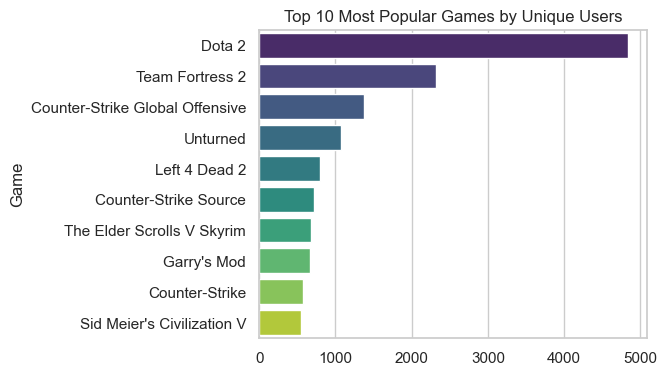

In [123]:
sb.set(style = "whitegrid")
plt.figure(figsize = (5,4))
sb.barplot(x = topTenGames.values, y = topTenGames.index, palette="viridis")
plt.title('Top 10 Most Popular Games by Unique Users')
plt.show()


### Question 8: Percentage of top 10 games purchase

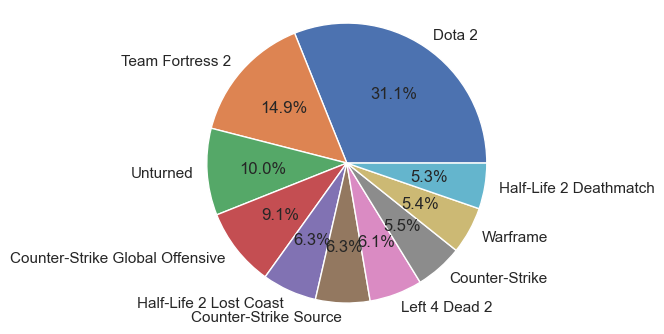

In [125]:
purchases = data[data["Behavior"] == "purchase"].groupby("Game")["UserID"].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(5,4))
plt.pie(purchases, labels=purchases.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()